# Imports

In [4]:
import sys
import os

sys.path.append(os.path.join(os.getcwd(), 'src'))
sys.path.append(os.path.join(os.getcwd(), 'src', 'models'))

In [5]:
import numpy as np
import torch
import seaborn as sns

from torchvision.models.segmentation import deeplabv3_mobilenet_v3_large
from src.models.custom_dataset import create_dataloaders
from matplotlib import pyplot as plt
from src.models.train_model import train_model
from src.models.eval_model import eval_model
from sklearn.metrics import confusion_matrix

# Constants

In [6]:
NUM_CLASSES = 20+1 # including background-class
MODEL_PATH = 'models/output/model.pth'
NUM_EPOCHS = 1000
BATCH_SIZE = 16

In [7]:
image_folder = 'data/processed/images/'
mask_folder = 'data/processed/masks/'

In [5]:
# dataset = TacoDataset(image_folder, mask_folder, transform=train_transform)
# labels_count = torch.zeros(NUM_CLASSES).to(device)

# for i, (_, masks) in enumerate(dataset):
#         print(i, end="\r")
#         labels = torch.flatten(masks)
#         labels_count += torch.bincount(labels, minlength=NUM_CLASSES)

In [6]:
# class_inverse_frequencies = 1.0 / labels_count
# class_weights = class_inverse_frequencies / torch.sum(class_inverse_frequencies)
# class_weights[0] = 0

# Trainning model

In [ ]:
model = train_model(model_path=MODEL_PATH,
            image_dir=image_folder,
            mask_dir=mask_folder,
            dataloader_dir='models/output/dataloader.pkl',
            num_classes=NUM_CLASSES,
            batch_size=BATCH_SIZE,
            num_epochs=NUM_EPOCHS,)

# Eval model

In [ ]:
eval_model(model_path=MODEL_PATH,
           dataloader_dir='models/output/dataloader.pkl',
           num_classes=NUM_CLASSES,)    

# Show predicts

In [10]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = deeplabv3_mobilenet_v3_large(num_classes=NUM_CLASSES)
model = model.to(device)
model.load_state_dict(torch.load(MODEL_PATH, map_location=device))

<All keys matched successfully>

In [11]:
_, _, test_dataloader = create_dataloaders(dataloader_dir='models/output/dataloader.pkl')

Loading  from file...
Done


In [20]:
example_of_preds = []
preds_arrays = []
mask_arrays = []

model.eval()
for i, (images, masks) in enumerate(test_dataloader):
    images = images.to(device)
    masks = masks.to(device)

    outputs = model(images)['out']
    preds = torch.argmax(outputs, dim=1)
    
    preds_arrays.append(torch.flatten(masks).cpu().numpy())
    mask_arrays.append(torch.flatten(preds).cpu().numpy())
    
    
    if i >= len(test_dataloader) - 5:
        images = torch.squeeze(images, dim=0).cpu().numpy().transpose(1, 2, 0)
        preds_image = preds.cpu().numpy().transpose(1, 2, 0)
        mask_image = torch.squeeze(masks, dim=0).cpu().numpy()

        example_of_preds.append([images, preds_image, mask_image])

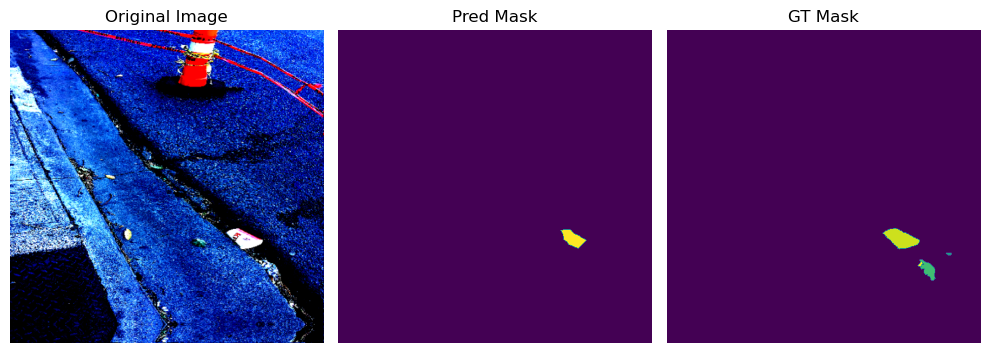

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


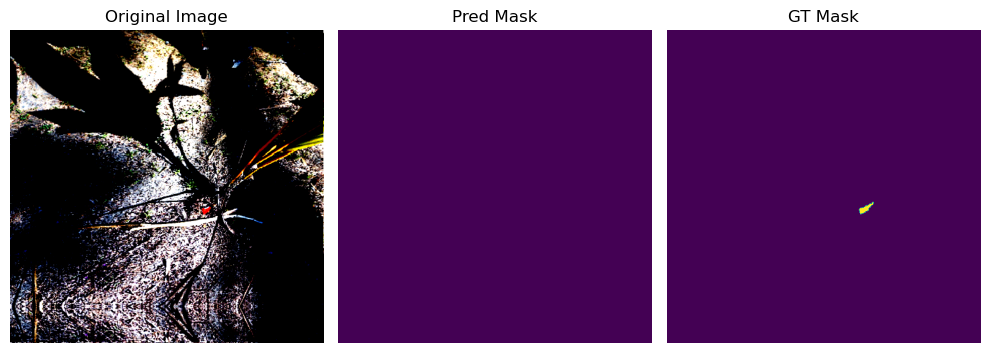

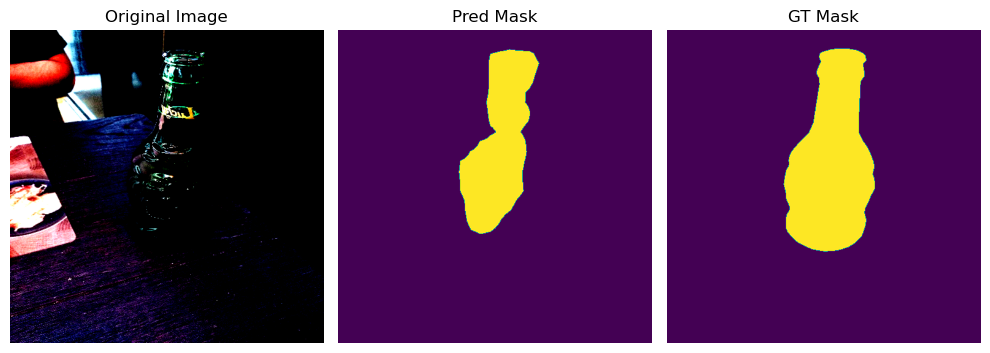

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


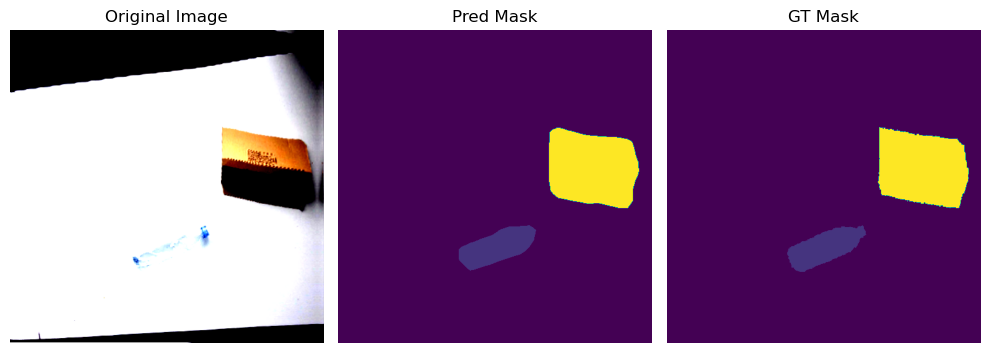

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


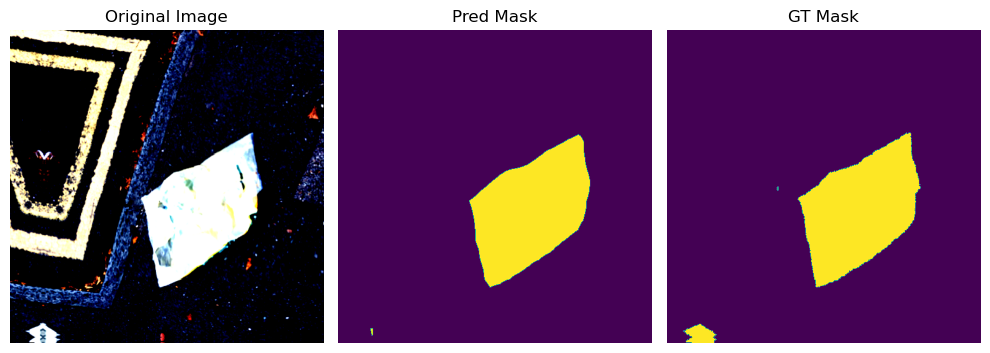

In [21]:
for images, preds_image, mask_image in example_of_preds:
    fig, axes = plt.subplots(1, 3, figsize=(10, 5))
    axes[0].imshow(images)
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    axes[1].imshow(preds_image)
    axes[1].set_title('Pred Mask')
    axes[1].axis('off')

    axes[2].imshow(mask_image)
    axes[2].set_title('GT Mask')
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()

In [25]:
mask_arrays = np.array(mask_arrays).flatten()
preds_arrays = np.array(preds_arrays).flatten()

In [6]:
cm = confusion_matrix(mask_arrays, preds_arrays)
cm[0][0] = 0 # ignore 0-class

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=False, cmap="Blues", fmt="d")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

NameError: name 'mask_arrays' is not defined